In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import joblib

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print('Imports successful!')

Imports successful!


## Load Models and Test Data

In [22]:
# Load trained models
lr_model = joblib.load('lr_model.joblib')
rf_model = joblib.load('rf_model.joblib')
best_model = joblib.load('best_model.joblib')

# Load metrics and test data from model training
with open('model_metrics.pkl', 'rb') as f:
    metrics_data = pickle.load(f)

lr_metrics = metrics_data['lr_metrics']
rf_metrics = metrics_data['rf_metrics']
best_model_name = metrics_data['best_model_name']
X_test = metrics_data['X_test']
y_test = metrics_data['y_test']

print(f'Loaded {X_test.shape[0]} test samples with {X_test.shape[1]} features')
print(f'Best model: {best_model_name}')

Loaded 1399 test samples with 19 features
Best model: Logistic Regression


## Confusion Matrices

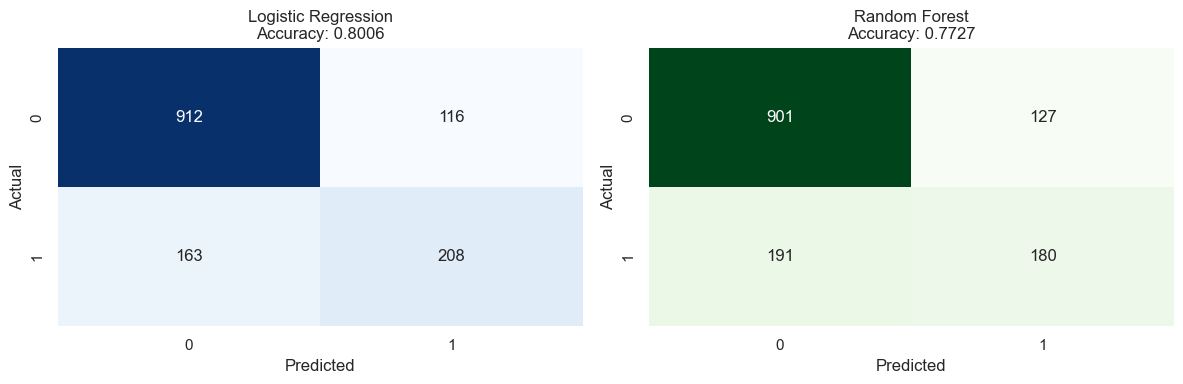

✓ Saved: confusion_matrices.png


In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Logistic Regression confusion matrix
sns.heatmap(lr_metrics['cm'], annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=False)
axes[0].set_title(f"Logistic Regression\nAccuracy: {lr_metrics['accuracy']:.4f}", fontsize=12)
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Random Forest confusion matrix
sns.heatmap(rf_metrics['cm'], annot=True, fmt='d', cmap='Greens', ax=axes[1], cbar=False)
axes[1].set_title(f"Random Forest\nAccuracy: {rf_metrics['accuracy']:.4f}", fontsize=12)
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.savefig('confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

print('✓ Saved: confusion_matrices.png')

## Model Performance Comparison

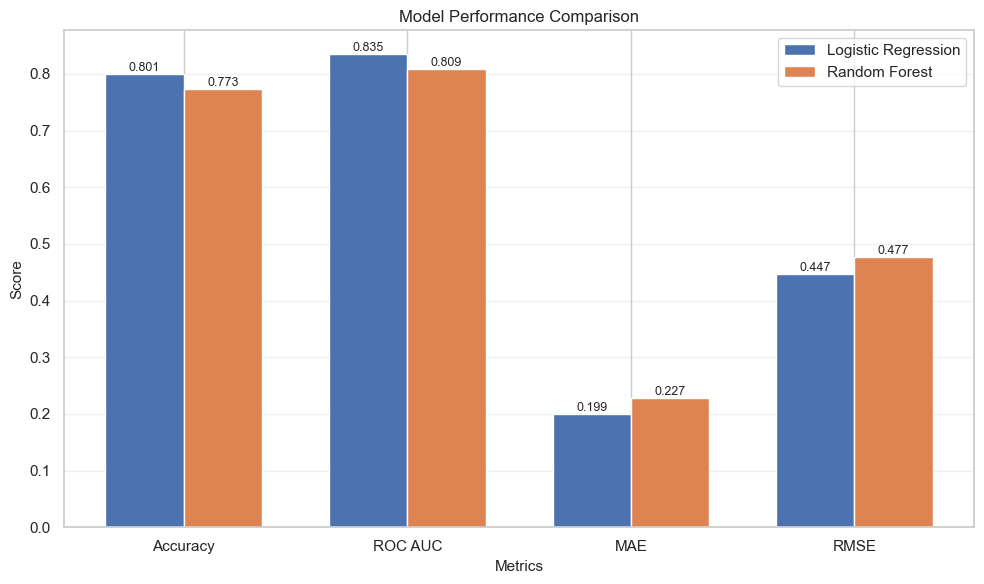

✓ Saved: model_comparison.png


In [24]:
# Prepare metrics for comparison
metrics_names = ['Accuracy', 'ROC AUC', 'MAE', 'RMSE']
lr_values = [lr_metrics['accuracy'], lr_metrics['auc'], lr_metrics['mae'], lr_metrics['rmse']]
rf_values = [rf_metrics['accuracy'], rf_metrics['auc'], rf_metrics['mae'], rf_metrics['rmse']]

x = np.arange(len(metrics_names))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, lr_values, width, label='Logistic Regression')
bars2 = ax.bar(x + width/2, rf_values, width, label='Random Forest')

ax.set_xlabel('Metrics', fontsize=11)
ax.set_ylabel('Score', fontsize=11)
ax.set_title('Model Performance Comparison', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(metrics_names)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print('✓ Saved: model_comparison.png')

## Prediction on New Customer

In [25]:
# Example new customer for prediction
new_customer = pd.DataFrame([{
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 12,
    'PhoneService': 'Yes',
    'MultipleLines': 'No',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 70.35,
    'TotalCharges': 845.5
}])

# Get predictions
pred_label = best_model.predict(new_customer)[0]
pred_proba = best_model.predict_proba(new_customer)[0, 1]

print(f'\nPREDICTION FOR NEW CUSTOMER (using {best_model_name}):')
print(f'  Churn prediction: {"YES" if pred_label == 1 else "NO"}')
print(f'  Churn probability: {pred_proba:.2%}')


PREDICTION FOR NEW CUSTOMER (using Logistic Regression):
  Churn prediction: NO
  Churn probability: 43.10%


## Summary Report

In [26]:
print(f"\n{'='*60}")
print("  TELCO CUSTOMER CHURN - PROJECT SUMMARY")
print(f"{'='*60}")

print(f"\nDATASET:")
print(f"  Test samples: {X_test.shape[0]}")
print(f"  Features: {X_test.shape[1]}")
print(f"  Actual churn rate: {y_test.mean():.2%}")

print(f"\nMODELS TRAINED:")
print(f"  1. Logistic Regression (linear, interpretable)")
print(f"  2. Random Forest (tree-based, 200 estimators)")

print(f"\nLOGISTIC REGRESSION PERFORMANCE:")
print(f"  Accuracy: {lr_metrics['accuracy']:.4f}")
print(f"  ROC AUC:  {lr_metrics['auc']:.4f}")
print(f"  MAE:      {lr_metrics['mae']:.4f}")
print(f"  RMSE:     {lr_metrics['rmse']:.4f}")

print(f"\nRANDOM FOREST PERFORMANCE:")
print(f"  Accuracy: {rf_metrics['accuracy']:.4f}")
print(f"  ROC AUC:  {rf_metrics['auc']:.4f}")
print(f"  MAE:      {rf_metrics['mae']:.4f}")
print(f"  RMSE:     {rf_metrics['rmse']:.4f}")

print(f"\n{'='*60}")
print(f"  ✓ RECOMMENDED MODEL: {best_model_name}")
print(f"    Accuracy: {max(lr_metrics['accuracy'], rf_metrics['accuracy']):.4f}")
print(f"{'='*60}")

print(f"\nOUTPUT FILES:")
print(f"  Models: lr_model.joblib, rf_model.joblib, best_model.joblib")
print(f"  Charts: confusion_matrices.png, predicted_vs_actual.png")
print(f"          feature_importances.png, model_comparison.png")

print(f"\n{'='*60}")


  TELCO CUSTOMER CHURN - PROJECT SUMMARY

DATASET:
  Test samples: 1399
  Features: 19
  Actual churn rate: 26.52%

MODELS TRAINED:
  1. Logistic Regression (linear, interpretable)
  2. Random Forest (tree-based, 200 estimators)

LOGISTIC REGRESSION PERFORMANCE:
  Accuracy: 0.8006
  ROC AUC:  0.8352
  MAE:      0.1994
  RMSE:     0.4466

RANDOM FOREST PERFORMANCE:
  Accuracy: 0.7727
  ROC AUC:  0.8088
  MAE:      0.2273
  RMSE:     0.4768

  ✓ RECOMMENDED MODEL: Logistic Regression
    Accuracy: 0.8006

OUTPUT FILES:
  Models: lr_model.joblib, rf_model.joblib, best_model.joblib
  Charts: confusion_matrices.png, predicted_vs_actual.png
          feature_importances.png, model_comparison.png

